# 自動車の走行距離予測 (SIGNATE 練習問題用コンペティション）

#### 【課題】
近年の排出ガス規制によって自動車メーカーは燃費性能の改善が求められており、実際の走行実験による燃費性能の改善が義務付けられています。<br>
しかし、この測定には様々な走行条件における測定が必要となるため、測定データを得るためには多大な時間とコストがかかることになります。<br>
この問題への解決手段の1つとして、自動車データを利用し、自動車の燃費を精度高く予測するモデルを作成します。<br>

#### 【本コンペについて】
このコンペティションは『自動車の属性データからガソリン１ガロンあたりの走行距離(mpg)を予測するモデルを作成する』という内容の練習課題です。<br>
コンペティション内では自動車データ「car_train.tsv」「car_test.tsv」が配布されています。<br>
既知のデータ「car_train.tsv」を用いて予測モデルを作成し、モデルから未知のデータ「car_test.tsv」のmpgを予測する『回帰問題』になります。<br>

※配布データの再配布は禁止されています。

#### 【データ概要】課題種別：回帰　データ種別：多変量　学習データサンプル数：199　説明変数の数：8　欠損値：あり

##### 

##### １．自動車データの読み込み・確認　
##### ２．自動車データの特徴把握　
##### ３．予測モデル（重回帰モデル）の作成と学習　
##### ４．予測モデルの精度改善：説明変数の対数化　
##### ５．テストデータの予測

##### 

## １．自動車データの読み込み・確認

まずは今回のデータ分析に使用するライブラリをimportします。それぞれ以下の機能が提供されています。

numpy：数値計算、pandas：データ加工、matplotlib＆seaborn：グラフによる可視化、scikit-learn：機械学習モデルの提供

In [1]:
# numpyライブラリ(数値計算)
import numpy as np
# pandasライブラリ(データ加工)
import pandas as pd
# matplotlibライブラリ(グラフ等作成)
import matplotlib.pyplot as plt
# seabornライブラリ(グラフ等作成)
import seaborn as sns
# scikit-learnライブラリ(データ分割、重回帰モデル、MSE:評価指標)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
# 画像処理
from PIL import Image

In [2]:
# データの表示行数を無制限に指定
pd.set_option('display.max_rows', None)

pandasのread_csv関数で、学習データ「car_train.tsv」を読み込みます。car_train.tsvの内容は以下の通りです。<br>
<br>
【カラム一覧】 <br>
mpg：燃料1ガロン当たりの走行マイル数 <br>
cylinders：シリンダー <br>
displacement：総排気量 <br>
horsepower：馬力 <br>
weight：重量 <br>
acceleration：加速度 <br>
model_year：製造年度 <br>
origin：オリジン <br>
car name：車名 <br>

In [3]:
# 学習データの読み込み
df_train = pd.read_csv('signate_data/car/car_train.tsv', delimiter='\t')
# 学習データを一部表示
df_train.head(50)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
5,16,27.0,4,151.0,90.00,2735.0,18.0,82,1,pontiac phoenix
6,18,16.0,6,250.0,105.0,3897.0,18.5,75,1,chevroelt chevelle malibu
7,19,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega
8,23,26.0,4,121.0,113.0,2234.0,12.5,70,2,bmw 2002
9,24,18.2,8,318.0,135.0,3830.0,15.2,79,1,dodge st. regis


ここで、カラム{id, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name}が『説明変数』、mpgカラムが『目的変数』になります。<br>
説明変数とは目的変数を予測（説明）するための変数のことであり、目的変数とは予測したい変数のことをいいます。<br>
因果関係における原因が説明変数、結果が目的変数とも捉えられます。<br>

In [4]:
# 学習データの行数、列数を確認
print('学習データの行数：', df_train.shape[0])
print('学習データの列数：', df_train.shape[1])

学習データの行数： 199
学習データの列数： 10


学習データのhorsepowerカラムの一部には欠損値「?」が存在するので、NaNに変換した後それを含む行を削除します。

In [5]:
# horsepowerカラムには曖昧な欠損値「？」が4箇所存在する
df_train[df_train['horsepower'] == '?']

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
24,48,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl
113,234,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
145,288,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
175,349,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto


In [6]:
# horsepowerカラムの曖昧な欠損値「？」をNaNに変換
df_train = df_train.replace('?', np.nan)
# 置換後の行を表示
df_train[df_train['horsepower'].isnull()]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
24,48,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl
113,234,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
145,288,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
175,349,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto


In [7]:
# NaNを含む行を削除
df_train = df_train.dropna()
# horsepowerカラムはobject型なのでfloat64に変換
df_train['horsepower'] = df_train['horsepower'].astype('float64').round(1)

現在の学習データの情報を確認すると、データ数(行数)が195になっており、horsepowerカラムがfloat型になっています。<br>

In [8]:
# df_trainのNon-Null CountとDtypeを確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            195 non-null    int64  
 1   mpg           195 non-null    float64
 2   cylinders     195 non-null    int64  
 3   displacement  195 non-null    float64
 4   horsepower    195 non-null    float64
 5   weight        195 non-null    float64
 6   acceleration  195 non-null    float64
 7   model year    195 non-null    int64  
 8   origin        195 non-null    int64  
 9   car name      195 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 16.8+ KB


### 

## ２．自動車データの特徴把握

現在どのような情報が燃費と関係性があるのか分からないため、モデルを作成する前に自動車データの特徴を把握します。<br>
データの特徴を把握することで、予測に役立ちそうな変数やモデルの予測精度を改善するための方策を見つけることができます。<br>
データの特徴・特性を、定量的に表した数値を『特徴量』といいます。<br>

2つの変数間の関係性を見る1つの方法として、変数間の『相関係数』を算出する方法があります。<br>
相関係数とは『相関関係』を0から1の間の絶対値で表した指標であり、相関関係とは「一方が変化すると、もう一方も変化する」という関係を指します。 <br>
「一方が増加すると、もう一方も増加する関係」を正の相関関係、「一方が増加すると、もう一方は減少する関係」を負の相関関係と呼びます。相関係数を確認すると、モデルを精度良く学習させるための有効な特徴量を見つけ出せることがあります。<br>

In [9]:
#各数値データの相関係数を確認
corr_matrix = df_train.corr()
corr_matrix

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
id,1.000000,-0.066567,0.109526,0.109085,0.083254,0.086323,-0.088383,-0.082099,-0.034860
mpg,-0.066567,1.000000,-0.773889,-0.806195,-0.791419,-0.821364,0.384631,0.569926,0.535130
cylinders,0.109526,-0.773889,1.000000,0.950627,0.851572,0.894891,-0.473792,-0.300641,-0.504343
displacement,0.109085,-0.806195,0.950627,1.000000,0.894965,0.933037,-0.522269,-0.330437,-0.585637
horsepower,0.083254,-0.791419,0.851572,0.894965,1.000000,0.872336,-0.661741,-0.384597,-0.421929
weight,0.086323,-0.821364,0.894891,0.933037,0.872336,1.000000,-0.401164,-0.269779,-0.540432
acceleration,-0.088383,0.384631,-0.473792,-0.522269,-0.661741,-0.401164,1.000000,0.191584,0.202153
model year,-0.082099,0.569926,-0.300641,-0.330437,-0.384597,-0.269779,0.191584,1.000000,0.121555
origin,-0.034860,0.535130,-0.504343,-0.585637,-0.421929,-0.540432,0.202153,0.121555,1.000000


相関係数が+1に近づくほどそれらは正の相関が強くなり、-1に近づくほど負の相関が強くなることを意味します。<br>
この結果を『ヒートマップ』と呼ばれるグラフで可視化してみましょう。ヒートマップではデータの個々の値が色で表現されます。<br>

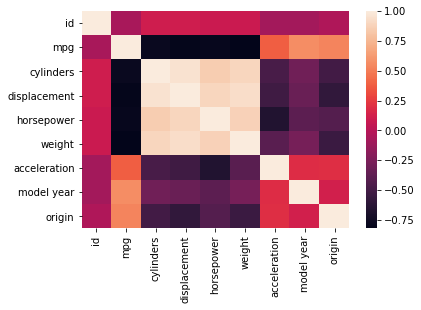

In [10]:
#ヒートマップで相関係数を可視化
sns.heatmap(corr_matrix)
plt.show()

mpgの行を見ると黒いマス(cylinders, displacement, horsepower, weight)が4つ並んでいます。これらにはそれぞれ互いに強い負の相関が存在することが分かります。<br>
量的データcylinders, displacement, horsepower, weightとmpgの散布図をそれぞれ作成すると以下の様になります。<br>

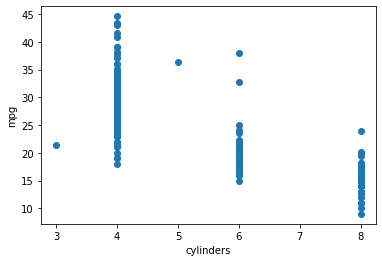

In [11]:
# cylinders,mpgの散布図
plt.scatter(df_train['cylinders'], df_train['mpg'])
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.show()

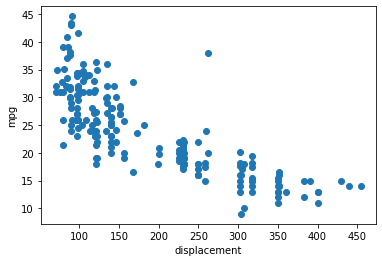

In [12]:
# displacement,mpgの散布図
plt.scatter(df_train['displacement'], df_train['mpg'])
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.show()

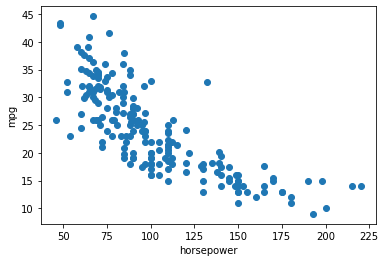

In [13]:
# horsepower,mpgの散布図
plt.scatter(df_train['horsepower'], df_train['mpg'])
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

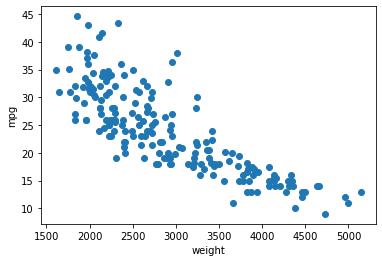

In [14]:
# weight,mpgの散布図
plt.scatter(df_train['weight'], df_train['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

つまり「自動車のシリンダー、総排気量、馬力、重量が大きくなれば燃費は下がる」という強い相関関係にあることが分かります。

### 

## ３．予測モデル（重回帰モデル）の作成と学習

目的変数mpgと強い相関を持つ説明変数{cylinders, displacement, horsepower, weight}は有効な変数だと分かりましたので、一旦これら4つの変数を用いて特徴量を作成し、モデルを学習してみましょう。

In [15]:
#特徴量（説明変数）の作成
X_data = df_train[['cylinders', 'displacement', 'horsepower', 'weight']]
X_data.head()

,cylinders,displacement,horsepower,weight
0,4,135.0,84.0,2525.0
1,4,89.0,71.0,1925.0
2,6,156.0,108.0,2930.0
3,4,90.0,75.0,2125.0
4,4,89.0,62.0,2050.0


In [16]:
#目的変数の作成
y_data = df_train['mpg']
y_data.head(10)

0    29.0
1    31.9
2    19.0
3    28.0
4    37.7
5    27.0
6    16.0
7    11.0
8    26.0
9    18.2
Name: mpg, dtype: float64

次にtrain_test_split関数を用いて、現在のデータを学習用データ（全体の75%）と評価用データ（全体の25%）に分割します。<br>
モデルのゴールは未知のデータに対してどれだけ正確に予測できるか、つまり汎化性能を上げることです。汎化性能を評価する為には、モデル作成に利用しない評価用のデータを残しておく必要があります。<br>
学習用データで予測モデルを学習させた後に、評価用データでモデルの予測精度を評価します。<br>

In [17]:
# 学習用データと評価用データへ分割
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, random_state=2)

In [18]:
# データ数の確認
print('学習用データのデータ数', X_train.shape[0])
print('評価用データのデータ数', X_valid.shape[0])

学習用データのデータ数 146
評価用データのデータ数 49


今回の分析では、『重回帰モデル』という線形回帰モデルを利用します。<br>
上で4種類の説明変数を横軸に、目的変数mpgを縦軸にして、散布図を4種類描画しました。<br>
線形回帰モデルの基本的な考えは、これらの散布図上にできるだけ多くの点たちの中間を通る「直線」を引くことです。<br>

例えば以下の散布図に対して、点たちの中間を通るオレンジの直線を引きます。<br>
このオレンジの直線が、線形回帰モデルの一つです。<br>

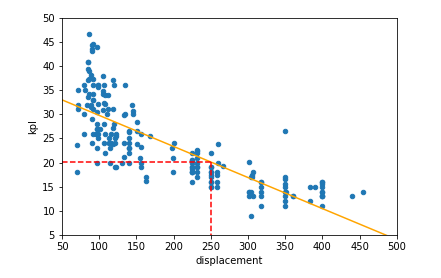

In [19]:
# 線形回帰モデルのイメージ図
im = Image.open('linear_regression.png')
im

この様なモデルに未知の説明変数を与えれば、目的変数が予測値として出力できるようになる、というのが回帰問題の基本的な考えです。<br>
複数の説明変数から目的変数を予測する線形回帰モデルを、重回帰モデルと言います。<br>
以下が重回帰モデルの式となります。<br>
<br>
$$ y = {a_1}{X_1} + {a_2}{X_2} + {a_3}{X_3} +...+ {a_n}{X_n} + {a_0} $$ <br>
<br>
$i=1,2,...,n$ : 各説明変数のインデックス <br>
${X_i}$ : 説明変数 <br>
${a_i}$ : 各説明変数の係数 <br>
${a_0}$ : 切片 <br>

重回帰モデルを定義し、学習用データを用いてモデルを作成します。<br>

In [20]:
# 重回帰モデルを準備
model = LR()
# 学習用データを用いてモデルを学習
model.fit(X_train, y_train)

LinearRegression()

予測モデルが作成できたら、次に『評価指標』を計算します。<br>
評価指標とは、学習させたモデルの性能やその予測値の良し悪しを測るための指標です。<br>
回帰問題における評価指標として、今回は『RMSE（平均平方二条誤差）』を利用します。<br>
RMSEは回帰問題で最もよく使われる代表的な評価指標です。各レコードの目的変数の実測値と予測値の差の二乗をとり、それらを平均した後に平方根をとることで計算されます。RMSEは以下の式で表されます。<br>

$$ \operatorname{RMSE}=\sqrt{\frac{1}{N}\sum_{i=1}^N(y_i-\hat{y_i})^2} $$

$N$ : レコード数 <br>
$i=1,2,...,N$ : 各レコードのインデックス <br>
${y_i}$ : $i$番目のレコードの実測値 <br>
$\hat{y_i}$ : $i$番目のレコードの予測値 <br>

In [21]:
# 学習データによる予測結果
y_pred_train = model.predict(X_train)

# 学習データのRMSEの算出
mse_train = MSE(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

In [22]:
# 評価データによる予測結果
y_pred_valid = model.predict(X_valid)

# 評価データのRMSEの算出
mse_valid = MSE(y_valid, y_pred_valid)
rmse_valid = np.sqrt(mse_valid)

# 学習および評価データに対するRMSEを表示
print('学習データに対するRMSE:', rmse_train)
print('評価データに対するRMSE:', rmse_valid)

学習データに対するRMSE: 4.3099135533709845
評価データに対するRMSE: 4.045536602183209


RMSEの数値が0に近づくほど、モデルの性能が良いことを意味します。<br>
この予測結果がどれほどの精度であるかを確認するため、散布図による可視化をしてみましょう。<br>

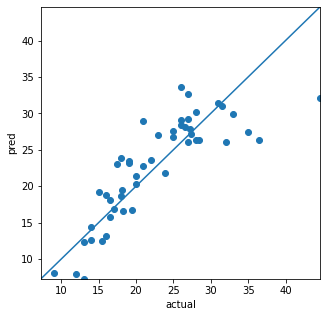

In [23]:
# 散布図の描画
plt.figure(figsize=(5,5))
plt.scatter(y_valid, y_pred_valid)

# y_valid及びy_pred_validの最小値・最大値を求める
valid_min = np.min(y_valid)
valid_max = np.max(y_valid)
pred_min = np.min(y_pred_valid)
pred_max = np.max(y_pred_valid)

# それぞれの値を比較し、最終的な最小値・最大値を求める
min_value = np.minimum(valid_min,pred_min)
max_value = np.maximum(valid_max,pred_max)

# x軸およびy軸の値域を指定する
plt.xlim([min_value,max_value])
plt.ylim([min_value,max_value])

# 対角線を引く
plt.plot([min_value,max_value],[min_value,max_value])

# x軸とy軸に名前を付ける
plt.xlabel('actual')
plt.ylabel('pred')

# 可視化結果を表示する為に必要な関数
plt.show()

上のグラフは、X軸が実測値（actual）かつY軸が予測値（pred）としたデータの点で描かれた散布図です。<br>
もしあるデータ点が対角線上にあれば実測値と予測値が同じなので、そのデータについては正しく予測ができている事を意味します。<br>
しかし散布図を見ると、いくつかの点が対角線から大きく離れているのが読み取れます。<br>
なので予測精度を特徴量の加工によって改善する必要があります。<br>

### 

## ４．予測モデルの精度改善：説明変数の対数化

「２．自動車データの特徴把握」での散布図には、指数関数のような分布が見られるものが3種類(displacementとmpgの散布図、horsepowerとmpgの散布図、weightとmpgの散布図)ありました。<br>
この場合、説明変数をnp.log関数で『対数化』することで直線的な分布に近づけることができ、重回帰モデルへの当てはまりがよくなり、結果として予測精度が向上する可能性があります。<br>
対数化とは、対数関数logを用いてある数式や関数の対数をとる手法です。例えば、以下の指数関数<br>

$$  y = 2^x  $$<br>

を底が2の対数関数で対数化すると、<br>

$$ y = log_2 2^x = x $$<br>

と変形でき直線の式になります。<br>

この手法を先ほど「２．自動車データの特徴把握」で確認した、displacementとmpgの散布図、horsepowerとmpgの散布図、weightとmpgの散布図に適用します。<br>
すると以前は多くの点が指数関数のような分布であったのに対し、適用後は以下の様に多くの点が直線のような分布になっているのが分かります。<br>

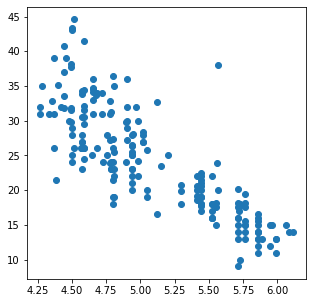

In [24]:
# 変数displacementを対数化し、結果を変数displacement_logに代入
df_train['displacement_log'] = np.log(df_train['displacement'])
plt.figure(figsize=(5,5))
plt.scatter(df_train['displacement_log'], df_train['mpg'])
plt.show()

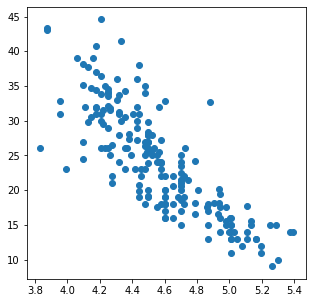

In [25]:
# 変数horsepowerを対数化し、結果を変数horsepower_logに代入
df_train['horsepower_log'] = np.log(df_train['horsepower'])
plt.figure(figsize=(5,5))
plt.scatter(df_train['horsepower_log'], df_train['mpg'])
plt.show()

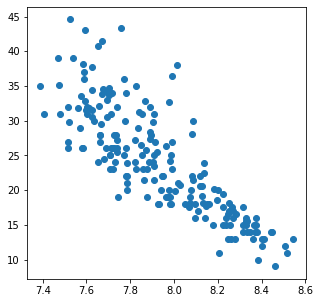

In [26]:
# 変数weightを対数化し、結果を変数weight_logに代入
df_train['weight_log'] = np.log(df_train['weight'])
plt.figure(figsize=(5,5))
plt.scatter(df_train['weight_log'], df_train['mpg'])
plt.show()

対数化した後の説明変数 {cylinders, displacement_log, horsepower_log, weight_log} に、変数 {acceleration, model year} を新たに加えて再度モデルを学習してみましょう。

In [27]:
# 目的変数及び説明変数を表す変数の準備
y_data = df_train['mpg']
X_data = df_train[['cylinders', 'displacement_log', 'horsepower_log', 'weight_log', 'acceleration', 'model year']] # 説明変数
# データを学習データ＆評価データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data,random_state=2)
# モデルの箱の準備および学習
fixed_model = LR()
fixed_model.fit(X_train, y_train)
# 予測値の算出
y_pred_train = fixed_model.predict(X_train)
y_pred_valid = fixed_model.predict(X_valid)
# MSEの算出
mse_train = MSE(y_train, y_pred_train)
mse_valid = MSE(y_valid, y_pred_valid)
# RMSEの算出
rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)
# RMSEの表示
print('学習データに対するRMSE（改善後）:', rmse_train)
print('評価データに対するRMSE（改善後）:', rmse_valid)

学習データに対するRMSE（改善後）: 3.0918627792625113
評価データに対するRMSE（改善後）: 2.8514505867814743


この予測結果に対する、対角線を用いた散布図を描きます。<br>

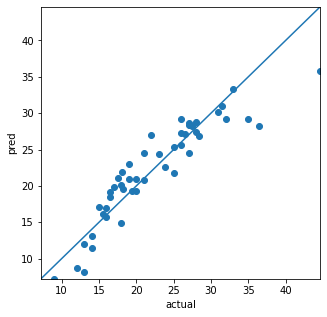

In [28]:
# 散布図の描画
plt.figure(figsize=(5,5))
plt.scatter(y_valid, y_pred_valid)

# y_valid及びy_pred_validの最小値・最大値を求める
valid_min = np.min(y_valid)
valid_max = np.max(y_valid)
pred_min = np.min(y_pred_valid)
pred_max = np.max(y_pred_valid)

# それぞれの値を比較し、最終的な最小値・最大値を求める
min_value = np.minimum(valid_min,pred_min)
max_value = np.maximum(valid_max,pred_max)

# x軸およびy軸の値域を指定する
plt.xlim([min_value,max_value])
plt.ylim([min_value,max_value])

# 対角線を引く
plt.plot([min_value,max_value],[min_value,max_value])

# x軸とy軸に名前を付ける
plt.xlabel('actual')
plt.ylabel('pred')

# 可視化結果を表示する為に必要な関数
plt.show()

精度を改善する前の予測結果と比較すると、RMSEは小さい値になり<br>
散布図では多くのデータ点が対角線上に近づいているので、モデルが改善されているのが分かります。<br>

###### 

## ５．テストデータの予測

これから使用する「car_test.tsv」は、目的変数であるmpgが含まれていない未知のデータです。先ほど改善したモデルを用いてmpgを予測します。

In [29]:
# テストデータの読み込み
df_test = pd.read_csv('signate_data/car/car_test.tsv', delimiter='\t')
# テストデータを一部表示
df_test.head(50)

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,6,145.0,76.00,3160.0,19.6,81,2,volvo diesel
1,2,6,250.0,98.00,3525.0,19.0,77,1,ford granada
2,4,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
3,5,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw)
4,6,4,97.0,88.00,2100.0,16.5,72,3,toyota corolla 1600 (sw)
5,7,4,107.0,90.00,2430.0,14.5,70,2,audi 100 ls
6,8,8,318.0,150.0,4190.0,13.0,76,1,dodge coronet brougham
7,10,6,231.0,105.0,3425.0,16.9,77,1,buick skylark
8,12,4,151.0,88.00,2740.0,16.0,77,1,pontiac sunbird coupe
9,14,6,232.0,90.00,3210.0,17.2,78,1,amc concord


In [30]:
# テストデータの行数、列数を確認
print('テストデータの行数：', df_test.shape[0])
print('テストデータの列数：', df_test.shape[1])

テストデータの行数： 199
テストデータの列数： 9


学習データに対して行った前処理をテストデータに対しても行います。<br>

In [31]:
# horsepowerカラムの曖昧な欠損値「？」をNaNに置換
df_test = df_test.replace('?', np.nan)
# horsepowerカラムはobject型なのでfloat64に変換
df_test['horsepower'] = df_test['horsepower'].astype('float64').round(1)

In [32]:
# horsepowerカラムの欠損値を平均値で穴埋め
df_test = df_test.fillna(df_test.mean())

In [33]:
# テストデータの情報を確認
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            199 non-null    int64  
 1   cylinders     199 non-null    int64  
 2   displacement  199 non-null    float64
 3   horsepower    199 non-null    float64
 4   weight        199 non-null    float64
 5   acceleration  199 non-null    float64
 6   model year    199 non-null    int64  
 7   origin        199 non-null    int64  
 8   car name      199 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 14.1+ KB


In [34]:
# 変数displacement, horsepower, weightを対数化
df_test['displacement_log'] = np.log(df_test['displacement'])
df_test['horsepower_log'] = np.log(df_test['horsepower'])
df_test['weight_log'] = np.log(df_test['weight'])

モデルに入力するためのテストデータが準備できましたので、作成したモデルを用いてテストデータの予測をしましょう。<br>

In [35]:
# 説明変数を表す変数の準備
X_test_data = df_test[['cylinders', 'displacement_log', 'horsepower_log', 'weight_log', 'acceleration', 'model year']] # 説明変数
# 予測値の算出
y_pred_test = fixed_model.predict(X_test_data)

この予測結果をCSVファイルにまとめて出力します。<br>

In [36]:
# 予測結果をDataFrame型でまとめ、提出用のCSVファイルを作成
submission = pd.DataFrame({'id': df_test['id'], 'mpg': y_pred_test})
submission.to_csv('signate_result/car_competition_predicted.csv', header=False, index=False)

In [37]:
# 予測結果を表示
submission

,id,mpg
0,1,27.338739
1,2,20.126327
2,4,29.415165
3,5,18.224396
4,6,25.769575
5,7,22.412482
6,8,15.941524
7,10,20.698534
8,12,25.115243
9,14,23.186200


出力したCSVファイルをコンペティションにて投稿して完了です。

最終投稿日時：2021-02-23 18:34:06 <br>
最終評価：3.1301686 <br>
最終順位：568位 / 1,173人投稿 <br>